In [37]:
import requests
import re
import time
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud#词云包

In [2]:
def get_one_page(url):#请求函数：获取某一网页上的所有内容
    headers = {
    'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36',
    'Host' : 'weibo.cn',
    'Accept' : 'application/json, text/plain, */*',
    'Accept-Language' : 'zh-CN,zh;q=0.9',
    'Accept-Encoding' : 'gzip, deflate, br',
    'Cookie' : 'xxxxx',
    'DNT' : '1',
    'Connection' : 'keep-alive',
    }#请求头的书写，包括User-agent,Cookie等

    response = requests.get(url,headers = headers)#利用requests.get命令获取网页html
    if response.status_code == 200:#状态为200即为爬取成功
        return response.text#返回值为html文档，传入到解析函数当中
    return None

def parse_one_page(html):#解析html并存入到文档result.txt中
    html = str(html)
    pattern = re.compile('<span class="ctt">.*?</span>', re.S)
    items = re.findall(pattern,html)
    result = str(items)

    with open('result.txt','a',encoding='utf-8') as fp:
        fp.write(result)

In [8]:
for i in range(200,694): 
    url = "https://weibo.cn/comment/IjyshgvhI?uid=7293062537&rl=0&page="+str(i)
    print(url)
    html = get_one_page(url)
    print(html)
    print('正在爬取第 %d 页评论' % (i+1))
    #parse_one_page(html)
    time.sleep(3)

https://weibo.cn/comment/IjyshgvhI?uid=7293062537&rl=0&page=200
None
正在爬取第 201 页评论
https://weibo.cn/comment/IjyshgvhI?uid=7293062537&rl=0&page=201
None
正在爬取第 202 页评论
https://weibo.cn/comment/IjyshgvhI?uid=7293062537&rl=0&page=202
None
正在爬取第 203 页评论


KeyboardInterrupt: 

In [25]:
df=pd.read_csv('results.csv').astype('str')
df

,ID,评论,性别
0,4446651890126660,补充：引用画皮2导演的评价确实有待商榷（因为画皮2早于对赌期），感谢建议，但关于作品和艺人的...,m
1,4446614493763894,看完这个视频最深的感受“当然你可以默默喜欢，资本冰冷无情但效率极高，资本会看到你的每次投票，...,f
2,4446608244115194,开始好奇赵薇,f
3,4446610593814315,最后一句话就是说:不要白嫖,f
4,4446617824046155,杨幂现在的困境其实不是她作为演员所面临的职业生涯瓶颈，而且市场萧条下，大部分影视制作公司同样...,m
5,4446607649187469,杨幂一路走来靠的都是自己的努力，加油,m
6,4446613709627561,其实我觉得，对赌那几年，播的戏，总体看比之前要好。《我是证人》《逆时营救》《绣春刀》，《宝贝...,f
7,4446612212319569,不要默默喜欢！因为讨厌的人不会默默讨厌。说真的嘉行如果没有杨幂，如何空手套资本？,f
8,4446617169997317,看完了，总结嘉行有今天全靠杨幂，杨幂🐮🍺,f
9,4446614128836124,看了感觉杨幂又拼又挺幸运的。但是想提醒一句，杨幂注意身边人吧，从经纪人阶级跨越为总裁的，真的...,f


In [27]:
segment=[]
for index, row in df.iterrows():
    segs=jieba.cut(row[1])
    for seg in segs:
        if len(seg)>1 and seg!='\r\n':
            segment.append(seg)

segment

['补充',
 '引用',
 '画皮',
 '导演',
 '评价',
 '确实',
 '有待',
 '商榷',
 '因为',
 '画皮',
 '早于',
 '赌期',
 '感谢',
 '建议',
 '关于',
 '作品',
 '艺人',
 '评价',
 '不过',
 '讨论',
 '补充',
 '一下',
 '时间',
 '顺序',
 '这个',
 '视频',
 '最深',
 '感受',
 '当然',
 '可以',
 '默默',
 '喜欢',
 '资本',
 '冰冷',
 '无情',
 '效率',
 '极高',
 '资本',
 '看到',
 '每次',
 '投票',
 '看到',
 '每次',
 '投票',
 '我们',
 '现在',
 '就是',
 '未来',
 '内容',
 '市场',
 '样子',
 '况且',
 '不要',
 '默默',
 '喜欢',
 '因为',
 '讨厌',
 '不会',
 '默默',
 '讨厌',
 '开始',
 '好奇',
 '赵薇',
 '最后',
 '一句',
 '就是说',
 '不要',
 '杨幂',
 '现在',
 '困境',
 '其实',
 '不是',
 '作为',
 '演员',
 '面临',
 '职业生涯',
 '瓶颈',
 '而且',
 '市场',
 '萧条',
 '大部分',
 '影视制作',
 '公司',
 '同样',
 '面临',
 '困境',
 '行业',
 '问题',
 '其实',
 '杨幂',
 '这个',
 '圈子里',
 '应该',
 '拥有',
 '事业',
 '明星',
 '胆子',
 '野心',
 '如若',
 '一日',
 '真的',
 '跨越',
 '阶级',
 '普通',
 '明星',
 '层面',
 '面临',
 '事业',
 '问题',
 '来说',
 '根本',
 '重要',
 '杨幂',
 '一路',
 '走来',
 '自己',
 '努力',
 '加油',
 '其实',
 '觉得',
 '几年',
 '总体',
 '看比',
 '之前',
 '证人',
 '逆时',
 '营救',
 '绣春刀',
 '宝贝儿',
 '之前',
 '没对',
 'hlod',
 '赌后',
 '工作量',
 '但是',
 '没有',
 '同时',
 '多个',
 '剧组',
 '三生',
 '幂剧',
 

In [31]:
words_df=pandas.DataFrame({'segment':segment})
words_df.head()
stopwords=pandas.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'],encoding="utf8")
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]


In [39]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values("计数",ascending=False)
#words_stat.to_excel('counts.xlsx',index=False)

/Users/xingqianli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


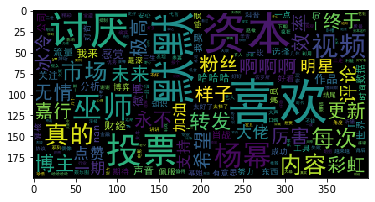

In [41]:
%matplotlib inline
wordcloud=WordCloud(font_path="simhei.ttf",background_color="black")
wordcloud=wordcloud.generate_from_frequencies(dict(words_stat.head(1000).itertuples(index=False)))
plt.imshow(wordcloud)
plt.show()
wordcloud.to_file("test.png")

/Users/xingqianli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


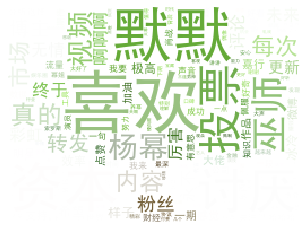

In [44]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
%matplotlib inline
bimg=imread('tre.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(dict(words_stat.head(4000).itertuples(index=False)))
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()
wordcloud.to_file("tree.png")

In [51]:
female,male=0,0
for index, row in df.iterrows():
    if row[2]=='m': 
        male+=1
    elif row[2]=='f': 
        female+=1

In [52]:
male

1161

In [53]:
female

3471

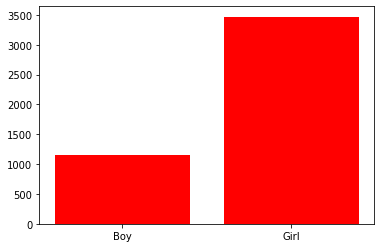

In [69]:
name_list = ["Boy",'Girl']
num_list = [male,female]
plt.bar(range(len(num_list)), num_list,color='r',tick_label=name_list)
plt.show()